In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | qafsah
City not found. Skipping...
Processing Record 3 of Set 1 | beckley
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | coihaique
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ranghulu
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | soyo
Processing Record 12 of Set 1 | malindi
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | pemangkat
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | adre
Processing Record 20 of Set 1 | sao joaquim
Processing Record 21 of Set 1 | tsihombe
City not found.

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,39.78,88,7,4.47,NZ,2021-09-22 18:18:29
1,Beckley,37.7782,-81.1882,76.59,100,90,21.85,US,2021-09-22 18:18:30
2,Yellowknife,62.4560,-114.3525,52.39,69,49,9.10,CA,2021-09-22 18:15:04
3,Coihaique,-45.5752,-72.0662,56.01,58,75,2.30,CL,2021-09-22 18:18:30
4,Rikitea,-23.1203,-134.9692,73.62,72,0,20.83,PF,2021-09-22 18:18:31
5,Ranghulu,46.6500,124.8667,53.69,95,100,5.97,CN,2021-09-22 18:18:32
6,Ushuaia,-54.8000,-68.3000,56.82,54,75,11.50,AR,2021-09-22 18:18:33
7,Soyo,-6.1349,12.3689,75.40,81,72,11.01,AO,2021-09-22 18:18:33
8,Malindi,-3.2175,40.1191,76.50,84,6,15.93,KE,2021-09-22 18:18:34
9,Albany,42.6001,-73.9662,80.80,74,100,1.99,US,2021-09-22 18:16:56


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2021-09-22 18:18:29,-46.2817,169.8464,39.78,88,7,4.47
1,Beckley,US,2021-09-22 18:18:30,37.7782,-81.1882,76.59,100,90,21.85
2,Yellowknife,CA,2021-09-22 18:15:04,62.4560,-114.3525,52.39,69,49,9.10
3,Coihaique,CL,2021-09-22 18:18:30,-45.5752,-72.0662,56.01,58,75,2.30
4,Rikitea,PF,2021-09-22 18:18:31,-23.1203,-134.9692,73.62,72,0,20.83
5,Ranghulu,CN,2021-09-22 18:18:32,46.6500,124.8667,53.69,95,100,5.97
6,Ushuaia,AR,2021-09-22 18:18:33,-54.8000,-68.3000,56.82,54,75,11.50
7,Soyo,AO,2021-09-22 18:18:33,-6.1349,12.3689,75.40,81,72,11.01
8,Malindi,KE,2021-09-22 18:18:34,-3.2175,40.1191,76.50,84,6,15.93
9,Albany,US,2021-09-22 18:16:56,42.6001,-73.9662,80.80,74,100,1.99


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

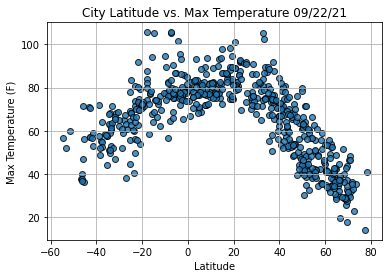

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

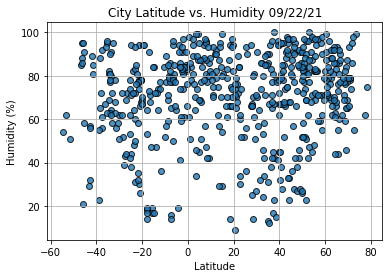

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

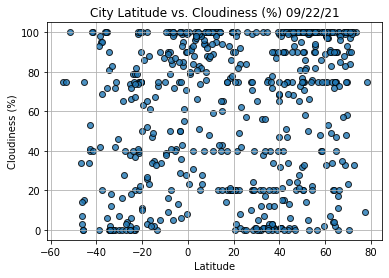

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

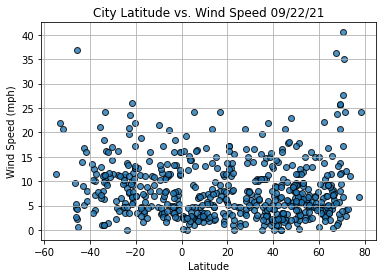

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                     Luderitz
Country                        NA
Date          2021-09-22 18:17:32
Lat                      -26.6481
Lng                       15.1594
Max Temp                    60.94
Humidity                       72
Cloudiness                      4
Wind Speed                   6.64
Name: 13, dtype: object

In [30]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]< 0)]

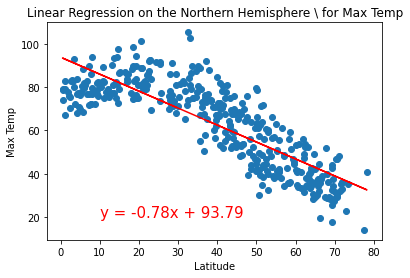

In [35]:
#Linear Reg for Northern Hem
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Max Temp', 'Max Temp', (10,20))


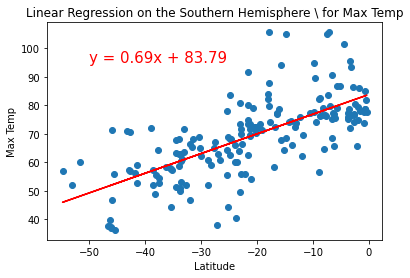

In [42]:
# Linear for Southern Hem 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Max Temp', 'Max Temp', (-50,95))

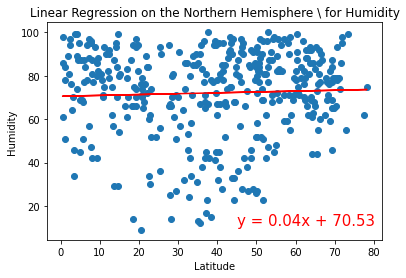

In [51]:
#Linear Reg for Northern Hem
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Humidity', 'Humidity', (45,11))


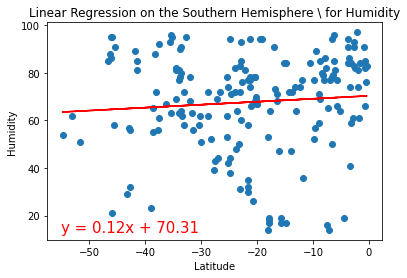

In [54]:
#Linear Reg for Southern Hem
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Humidity', 'Humidity', (-55,13))

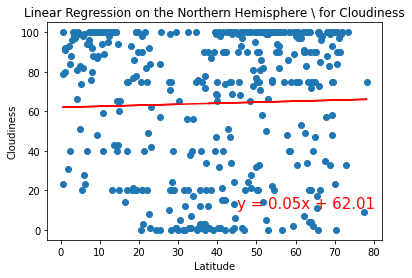

In [55]:
#Linear Reg for Northern Hem
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Cloudiness', 'Cloudiness', (45,11))

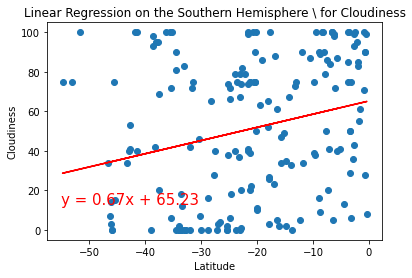

In [56]:
#Linear Reg for Southern Hem
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Cloudiness', 'Cloudiness', (-55,13))

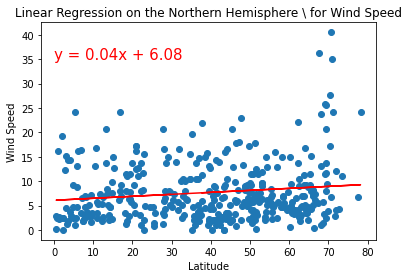

In [59]:
#Linear Reg for Northern Hem
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed', (0,35))

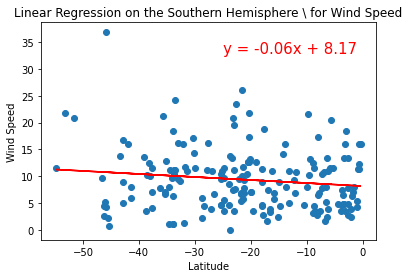

In [63]:
#Linear Reg for Southern Hem
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function 
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed', (-25,33))